## CMPE 548 - Assignment 2

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from numpy import linalg as LA
from scipy.stats import multivariate_normal

In [2]:
def norm(x,p): # p-norm of vector x
    xx = np.power(np.absolute(x),p)
    return np.power(np.sum(xx,axis=1),1.0/p)

### 1. Importance Sampling

#### First Method

Let $p(x) = \dfrac{\mathbf{1}_{\|x\|_p\leq 1}}{Z} $ be the uniform distribution on unit $p$-norm ball with area $Z$.

$$
1 = \int p(x) \, dx = \int \dfrac{\mathbf{1}_{\|x\|_p\leq 1}}{Z} \, dx 
= \int \dfrac{\mathbf{1}_{\|x\|_p\leq 1}}{Z} \dfrac{q(x)}{q(x)} \, dx
= \dfrac{1}{Z} \left< \dfrac{\mathbf{1}_{\|x\|_p\leq 1}}{q(x)} \right>_{q(x)}
$$

Let define $w(x) = \dfrac{\mathbf{1}_{\|x\|_p\leq 1}}{q(x)} $. Therefore,

$$
Z = \left< w(x) \right>_{q(x)}
$$

And the variance $w(x)$ is calculated by

$$
\sigma^2_{w(x)} = \left< w^2(x) \right>_{q(x)} - \left< w(x) \right>_{q(x)}^2 = \left< w^2(x) \right>_{q(x)} - Z^2
$$

If we draw N samples $x_1,x_2,\cdots, x_N$ from $q(x)$ and use $\hat{Z} = \dfrac{\sum^N_{i=1} w(x_i)}{N}$ as an estimator of $Z$, then the variance of this estimator is $\dfrac{\sigma^2_{wx}}{N}$. And the $\sigma^2_{wx}$ can be estimated by

$$
s^2 = \dfrac{\sum^N_{i=1} (\hat{Z}-w(x_i))^2}{N-1}
$$

Choose $q(x) = \dfrac{1}{2} \mathcal{N}(x;0,\text{diag}(\sigma^2_1,\sigma^2_2)) + \dfrac{1}{2} \mathcal{N}(x;0,\text{diag}(\sigma^2_2,\sigma^2_1))$.

In [3]:
sigma1,sigma2 = (1.0/3)**2,(1.0/8)**2
cov1 = np.diag([sigma1,sigma2])
cov2 = np.diag([sigma2,sigma1])

In [4]:
q = lambda x: 0.5 * multivariate_normal.pdf(x,[0,0],cov1) + 0.5 * multivariate_normal.pdf(x,[0,0],cov2)
w = lambda x: (norm(x,0.5)<= 1)/q(x)

In [5]:
def generateSampleFromMixture(N=1):
    global cov1,cov2
    sample = np.zeros([N,2])
    for i in range(N):
        u = np.random.rand();
        if u<0.5:
            sample[i,:] = np.random.multivariate_normal([0,0],cov1)
        else:
            sample[i,:] = np.random.multivariate_normal([0,0],cov1)
    return sample;

In [6]:
N = 1000;
x = generateSampleFromMixture(N)
W = w(x)
Z = np.mean(W)
Var = np.var(W)/N
print "Estimation of Area = ",Z
print "Variance of Estimator = ", Var
print "Standard Deviation of Estimator = ", np.sqrt(Var)

Estimation of Area =  0.651955848379
Variance of Estimator =  0.000629015360091
Standard Deviation of Estimator =  0.0250801786296


#### Second Method

Another approach would be as follows, let $p(r,\theta)$ be a uniform distribution in the euclidean unit norm ball and have the following form

\begin{equation}
\begin{split}
p(r,\theta) &= p(r)p(\theta) \\
p(\theta) &= \mathcal{U}(\theta;0,2\pi) \\
p(r) &= 2r \\
\end{split}
\end{equation}

and x = $\begin{bmatrix} r\cos{\theta} \\ r\sin{\theta} \end{bmatrix}$ be the sample generated from $p(r,\theta)$. Then the area of unit $p$-norm ball $Z = \pi P(\|x\|_p \leq 1)$.

\begin{equation}
\begin{split}
P(\|x\|_p \leq 1) &= P(r(\cos^p{\theta} + \sin^p{\theta})^{1/p} \leq 1) \\
&= P \left(r \leq \dfrac{1}{(|\cos{\theta}|^p + |\sin{\theta}|^p)^{1/p}}\right)
\end{split}
\end{equation}

Define $r_p(\theta) = \dfrac{1}{(|\cos{\theta}|^p + |\sin{\theta}|^p)^{1/p}}$. So,

\begin{equation}
\begin{split}
P(\|x\|_p \leq 1) &= P(r \leq r_p(\theta)) \\
&= \int_\theta \int_r \mathbf{1}_{r \leq r_p(\theta)} p(r,\theta)\, dr \, d\theta \\
&= \int_\theta \int_r \mathbf{1}_{r \leq r_p(\theta)} 2r \, p(\theta)\, dr \, d\theta \\
&= \int_\theta \int^{r_p(\theta)}_0 2r \, p(\theta)\, dr \, d\theta \\
&= \int_\theta r^2_p(\theta) \, p(\theta)\, d\theta \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
Z = &= \pi P(\|x\|_p \leq 1) \\
&= \pi \int_\theta r^2_p(\theta) \, p(\theta)\, d\theta \\
&= \int_\theta \pi r^2_p(\theta) \, p(\theta)\, d\theta \\
&= \left< \pi r^2_p(\theta) \right>_{p(\theta)}
\end{split}
\end{equation}

In [7]:
N=1000;
r_p = lambda theta,p : 1.0/ (np.abs(np.cos(theta))**p +np.abs(np.sin(theta))**p)**(1.0/p)

In [8]:
theta = np.random.rand(N) * 2 * np.pi
sample = np.pi * (r_p(theta,0.5)**2)
Z = np.mean(sample)
Var = np.var(sample)/N
print "Estimation of Area = ",Z
print "Variance of Estimator = ", Var
print "Standard Deviation of Estimator = ", np.sqrt(Var)

Estimation of Area =  0.669119048487
Variance of Estimator =  0.000159046723026
Standard Deviation of Estimator =  0.0126113727653


### 2. Markov Chain

#### (a) Transition Matrix

In a 6-sided die, opposite faces add up to 7. Therefore, if $n_{t-1}$ is on the top, and $f_t$ is chosen, then $n_t \in \{n_{t-1},7-n_{t-1}, f_{t}, 7 - f_{t}\}$. At first rotation, opposite of $f_t$ comes to the top. At second, opposite of $n_{t-1}$ comes to the top. At third, $f_t$ comes to the top. And at fourth rotation, $n_{t-1}$ comes to the top. 

Let $F_t = \begin{bmatrix} n_{t-1} & 7 - f_{t} & 7-n_{t-1} & f_{t} \end{bmatrix}$. Then, $n_t = F_t(\ f_t \mod 4 )$. We can construct transtion matrix, by adding $1/4$ to $A_{n_t,n_{t-1}}$ for each different $(n_{t-1},f_t)$ tuple. So,

$$
A = \begin{bmatrix}
1/4 & 0   & 0   & 0   & 0   & 1/4 \\
1/4 & 1/4 & 1/4 & 1/4 & 1/4 & 1/4 \\
1/4 & 1/4 & 0   & 1/2 & 1/4 & 1/4 \\
0   & 0   & 1/2 & 0   & 0   & 0   \\
0   & 1/4 & 0   & 0   & 1/4 & 0   \\
1/4 & 1/4 & 1/4 & 1/4 & 1/4 & 1/4 \\
\end{bmatrix}
$$

In [9]:
A = np.array([[ 0.25, 0,    0,    0,    0,    0.25],
              [ 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
              [ 0.25, 0.25, 0,    0.5,  0.25, 0.25],
              [  0,   0,    0.5,  0,    0,    0   ],
              [  0,   0.25, 0,    0,    0.25, 0   ],
              [ 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]);

#### (b) Stationary Distribution via Eigenvalues

The chain is aperiodic, because it has loops and is irreducible, because every state is accessible for every initial state. Therefore, the chain is ergodic and has a stationary distribution. Stationary distribution of $A$ is its eigenvector corresponding $\lambda = 1$.

In [10]:
es, vs = np.linalg.eig(A)
i = np.argmax(np.isclose(es, 1.0))
pi = vs[:, i]
pi = pi / sum(pi)
print "Stationary Distribution:\n", pi

Stationary Distribution:
[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]


Stationary distribution is not uniform.

#### (c) Detailed Balance

Define $B$ matrix so that, $B_{ij} = A_{ij}\pi_j$. Detailed balance condition $A_{ij}\pi_j = A_{ji}\pi_i$ is satisfied iff $B_{ij} = B_{ji}$ which means $B$ is symmetric.

In [11]:
B = np.einsum("ij,j->ij",A,pi)
print "B =\n", B
print "Detailed balance condition: ",np.allclose(B,B.T)

B =
[[ 0.02083333  0.          0.          0.          0.          0.0625    ]
 [ 0.02083333  0.0625      0.05555556  0.02777778  0.02083333  0.0625    ]
 [ 0.02083333  0.0625      0.          0.05555556  0.02083333  0.0625    ]
 [ 0.          0.          0.11111111  0.          0.          0.        ]
 [ 0.          0.0625      0.          0.          0.02083333  0.        ]
 [ 0.02083333  0.0625      0.05555556  0.02777778  0.02083333  0.0625    ]]
Detailed balance condition:  False


Detailed balance condition is not satisfied.

#### (d) Mixture Time

In [12]:
def var_norm(x,y):
    return 0.5 * np.sum(np.abs(x-y))

In [13]:
epsilon = 1e-8
pi_initial = np.array([1,0,0,0,0,0],dtype=np.float)
pi_current = np.array([1,0,0,0,0,0],dtype=np.float)
d = var_norm(pi,pi_current)
Tmix = 0

In [14]:
while(d > epsilon):
    pi_current = A.dot(pi_current)
    d = var_norm(pi,pi_current)
    Tmix += 1

print "Mixture Time = ", Tmix 

Mixture Time =  24


#### (e) Visualize powers of Transition Matrix

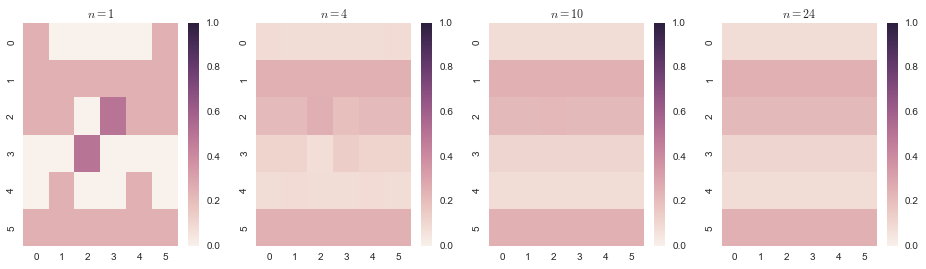

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for i, n in enumerate([1, 4, 10, Tmix]):
    sns.heatmap(np.linalg.matrix_power(A, n), vmin = 0, vmax = 1, ax = ax[i])
    ax[i].set_title("$n = %d$" % n)

In [16]:
n = 50
PI = np.zeros([6,n])
PI[:,0] = pi_initial
for i in range(1,n):
    PI[:,i] = A.dot(PI[:,i-1])

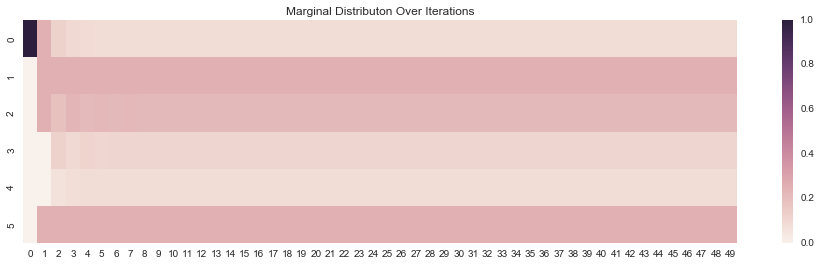

In [17]:
plt.figure(figsize=(16,4))
sns.heatmap(PI,vmin=0,vmax=1);
plt.title("Marginal Distributon Over Iterations");

#### (f) Independent Samples From Chain

In [18]:
def simulateChain(P, N):
    chain = np.zeros(N,dtype=int)
    for i in range(1,N):
        chain[i] = np.random.choice(range(6), p = P[:, chain[i-1]])
    return chain

In [19]:
N = 1000
samples = np.zeros([N, Tmix],dtype=int)
for i in range(N):
    samples[i,:] = simulateChain(A, Tmix)

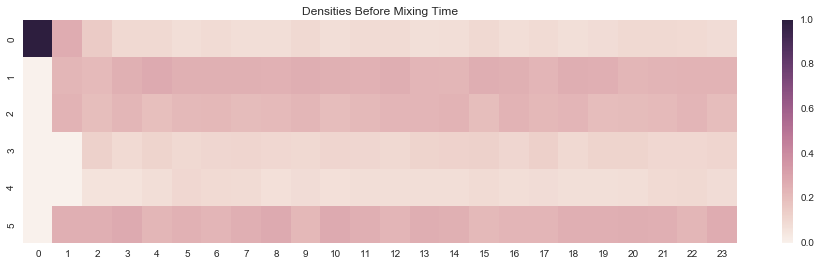

In [20]:
column_histograms = np.apply_along_axis(lambda x: np.histogram(x, bins=[0,1,2,3,4,5,6], density = True)[0], 0, samples)
plt.figure(figsize=(16, 4))
sns.heatmap(column_histograms)
plt.title("Densities Before Mixing Time");

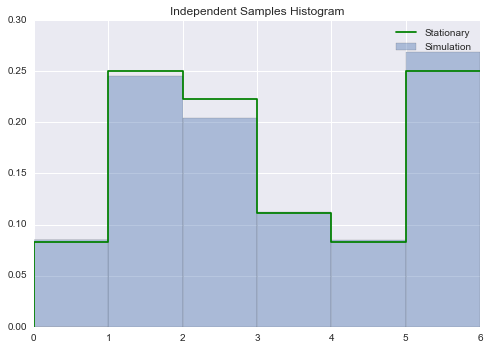

In [21]:
X = samples[:,Tmix-1] # independent samples recorded at Tmix
sns.distplot(X, norm_hist=True, kde = False, bins = [0,1,2,3,4,5,6], label="Simulation");
plt.step(np.hstack((0,pi)),"g", label="Stationary");
plt.legend();
plt.title("Independent Samples Histogram");

#### (g) Run a single chain

In [22]:
single_chain = simulateChain(A,N+Tmix)[Tmix:]

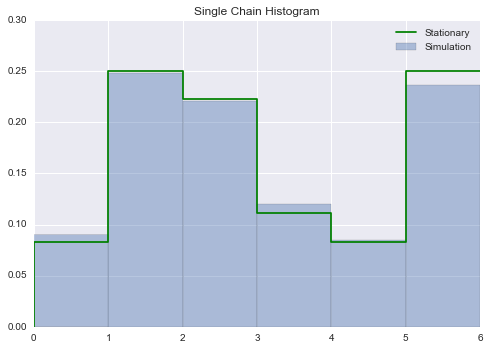

In [23]:
sns.distplot(single_chain, norm_hist=True, kde = False, bins = [0,1,2,3,4,5,6], label="Simulation");
plt.step(np.hstack((0,pi)),"g", label="Stationary");
plt.legend();
plt.title("Single Chain Histogram");